In [1]:
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import scipy.spatial.distance as sp

# K-Means

In [2]:
X, y_true = make_blobs(n_samples=1000, centers=4, cluster_std=0.6, random_state=0)
X = X[:,::-1]

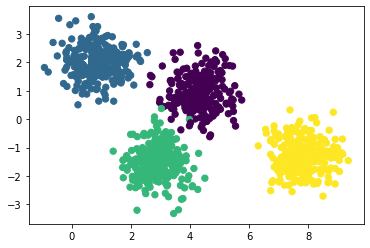

In [3]:
plt.scatter(X[:,0],X[:,1],c=y_true,s=40)

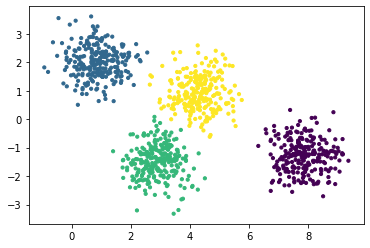

In [4]:
kmeans = KMeans(4, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(X[:,0],X[:,1], c=labels, s=10, cmap="viridis")

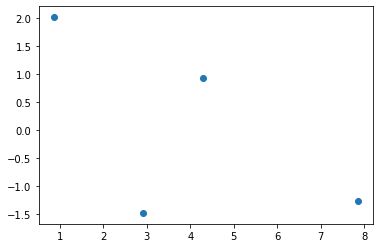

In [5]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])

In [35]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    kmeans.fit(X)
    labels = kmeans.predict(X)
    ax = ax or plt.gca()
    ax.axis("equal")
    ax.scatter(X[:,0],X[:,1],c=labels,s=30,cmap="viridis",zorder=2)
    #Zorder is where scatter is plotted, infront of the other objects or behind
    centers=kmeans.cluster_centers_
    radii=[sp.cdist(X[labels==i],[center]).max() for i, center in enumerate(centers)]
    for c,r in zip(centers,radii):
        ax.add_patch(plt.Circle(c,r,fc='#CCCCCC',lw=3,alpha=0.5,zorder=1))
        # zorder=1 (lingkaran dibelakang point scatter)
    print (radii)

[1.8239662918172246, 2.0291104149395096, 1.91499136281317, 1.74351241647567]


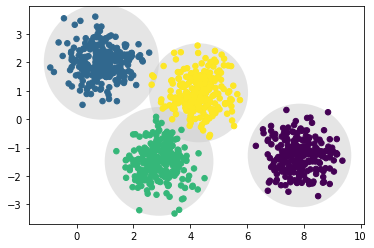

In [36]:
plot_kmeans(kmeans, X)

Transformasi X dengan transformasi random normal (2x2), clustering pada X_stretched

[2.3360146684461967, 2.556156225066185, 2.9831046715321237, 2.4674974357634185]


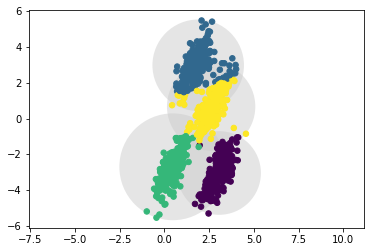

In [38]:
rng = np.random.RandomState(42)
X_stretched = np.dot(X,rng.randn(2,2))
kmeans=KMeans(4, random_state=0)
plot_kmeans(kmeans,X_stretched)

# GMM
The difference of GMM and K-means is just the distance algorithm of GMM uses gaussian distribution instead of eucledian distance
<img src="https://miro.medium.com/max/1416/1*5u9XnJO_5ZAs8HVgbrG_gQ.png">

In [42]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(4).fit(X)
gmm.covariances_

array([[[ 0.34204459,  0.01149367],
        [ 0.01149367,  0.36804557]],

       [[ 0.36254879, -0.00659192],
        [-0.00659192,  0.32386081]],

       [[ 0.38967808, -0.01280986],
        [-0.01280986,  0.3083205 ]],

       [[ 0.30736425, -0.00201764],
        [-0.00201764,  0.341772  ]]])

In [44]:
gmm.means_

array([[ 4.2936693 ,  0.91959855],
       [ 7.84863006, -1.27771252],
       [ 0.87945824,  2.00938588],
       [ 2.90211505, -1.49110482]])

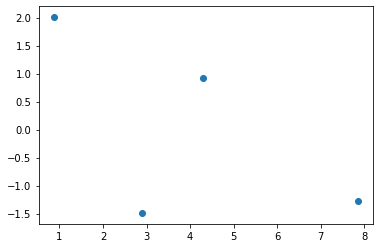

In [45]:
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])

In [65]:
probs=gmm.predict_proba(X)
print(probs[:5].round(3))

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


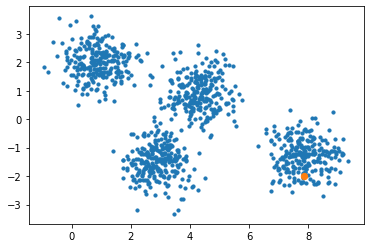

In [66]:
plt.scatter(X[:,0],X[:,1],s=10)
plt.scatter(X[0,0],X[0,1],s=40)

In [67]:
gmm.weights_

array([0.2507707 , 0.25000897, 0.25126029, 0.24796003])

## GMM as Density Estimator
GMM can also be used as density estimator for other function and regenerate such structure of data generation